In [244]:
get_ipython().magic(u'run visualizations.ipynb')
import sys
from hits import CyDetHits, CTHHits, CDCHits
from memory_profiler import memory_usage
from collections import Counter
sys.path.insert(0, '../modules')

Populating the interactive namespace from numpy and matplotlib


# Import Data

In [307]:
sig_file = data_file =  "/vols/comet00/users/elg112/ICEDUST"\
            "/local_storage/MC3b_tree/sig_root/1000_cdc_merged.root"

In [308]:
bck_file = "/vols/comet00/users/elg112/ICEDUST"\
            "/local_storage/MC3b_tree/event_root"\
            "/1_2500_merged_cdc_sum_hit.root"

In [310]:
from root_numpy import root2array


ice_sample = root2array(sig_file, treename="COMETEventsSummary")

In [311]:
for name in ice_sample.dtype.names:
    print name

CDCHit.fDriftDist
CDCHit.fDriftTime
CDCHit.fTurnID
CDCHit.fTrack.fTrackID
CDCHit.fTrack.fParentTrackID
CDCHit.fTrack.fPID
CDCHit.fTrack.fTags.fTagMaskPersisted
CDCHit.fTrack.fTagsAsParent.fTagMaskPersisted
CDCHit.fTrack.fTagsAsDaughter.fTagMaskPersisted
CDCHit.fTrack.fStartMomentum.fX
CDCHit.fTrack.fStartMomentum.fY
CDCHit.fTrack.fStartMomentum.fZ
CDCHit.fTrack.fStopMomentum.fX
CDCHit.fTrack.fStopMomentum.fY
CDCHit.fTrack.fStopMomentum.fZ
CDCHit.fTrack.fStartPosGlobal.fP.fX
CDCHit.fTrack.fStartPosGlobal.fP.fY
CDCHit.fTrack.fStartPosGlobal.fP.fZ
CDCHit.fTrack.fStartPosGlobal.fE
CDCHit.fTrack.fStopPosGlobal.fP.fX
CDCHit.fTrack.fStopPosGlobal.fP.fY
CDCHit.fTrack.fStopPosGlobal.fP.fZ
CDCHit.fTrack.fStopPosGlobal.fE
CDCHit.fMCPos.fP.fX
CDCHit.fMCPos.fP.fY
CDCHit.fMCPos.fP.fZ
CDCHit.fMCPos.fE
CDCHit.fCharge
CDCHit.fChannel
CDCHit.fEventNumber
CDCHit.fHitNumber


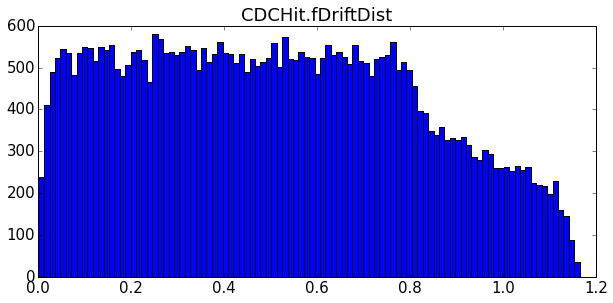

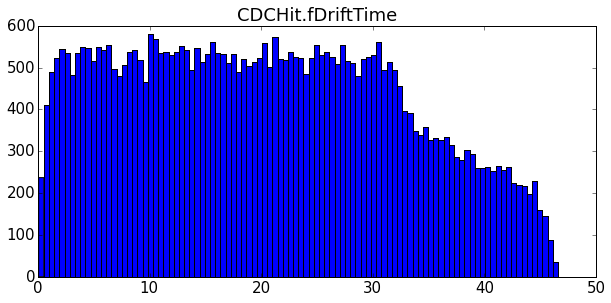

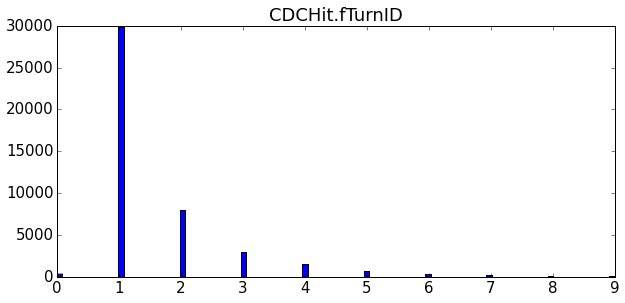

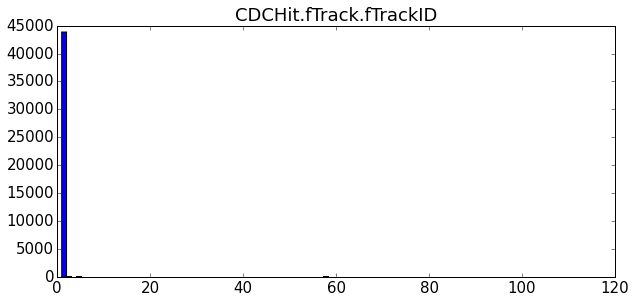

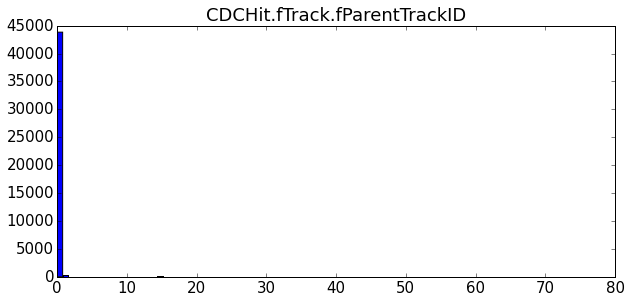

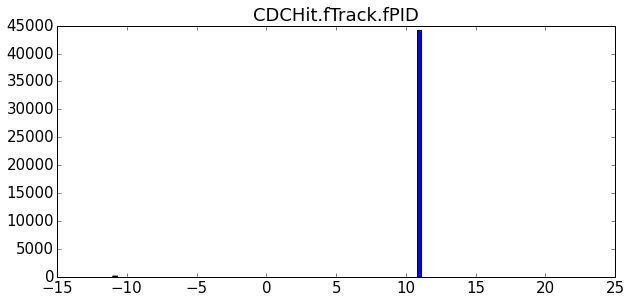

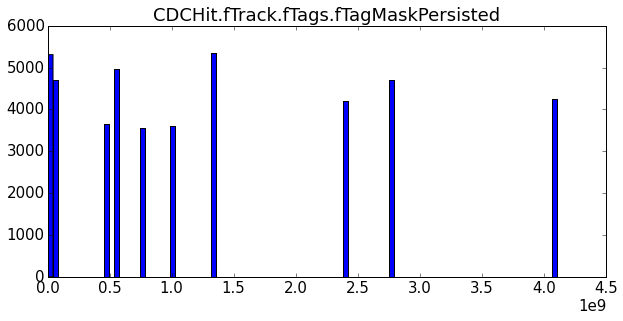

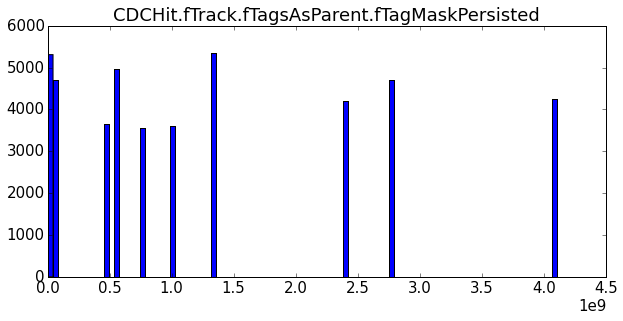

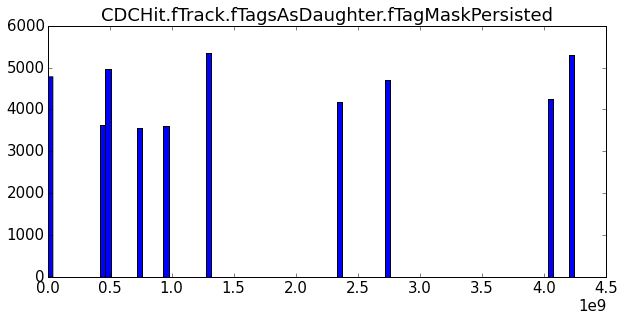

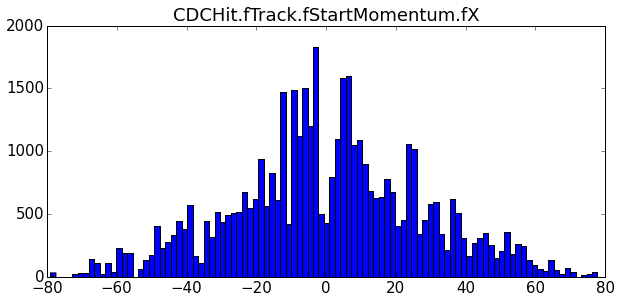

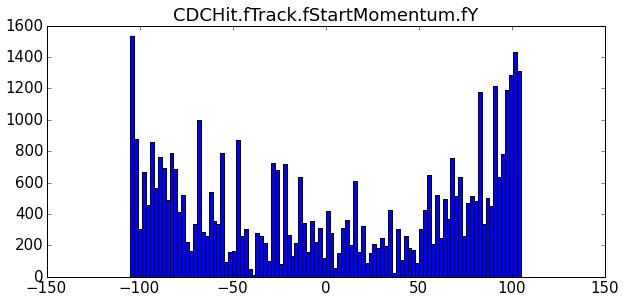

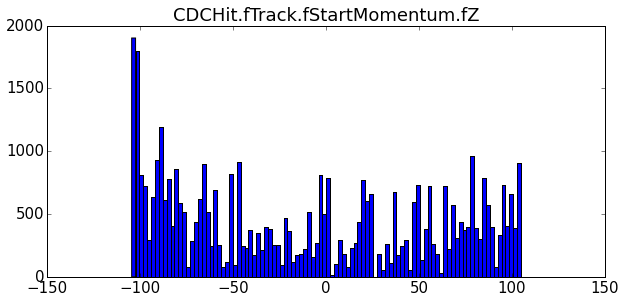

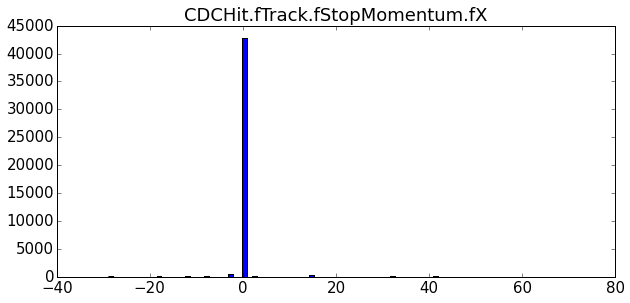

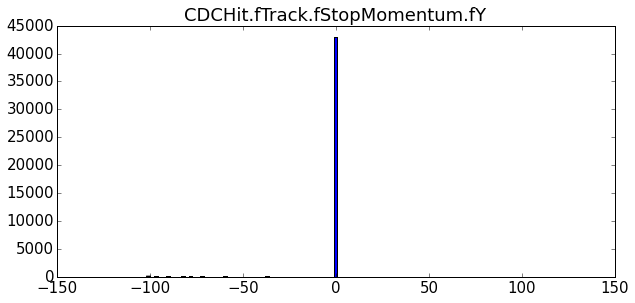

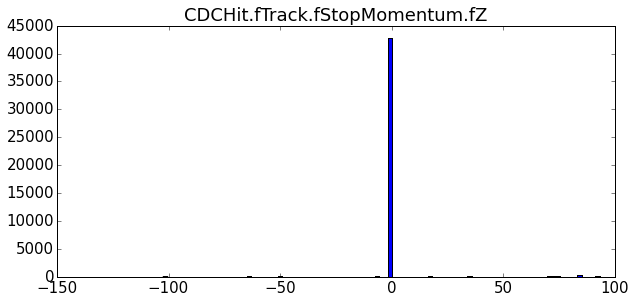

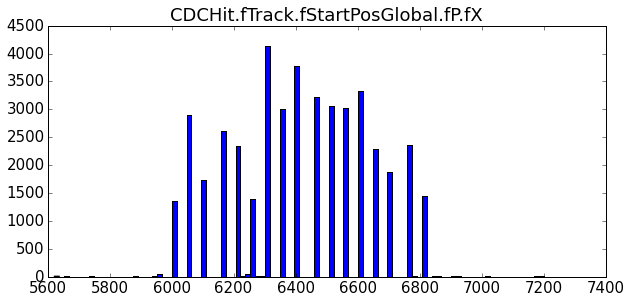

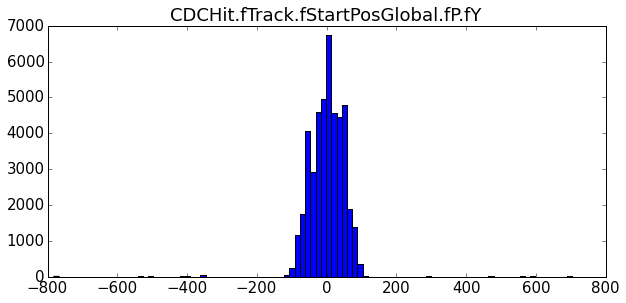

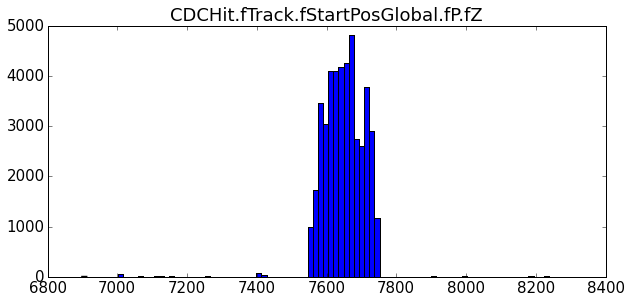

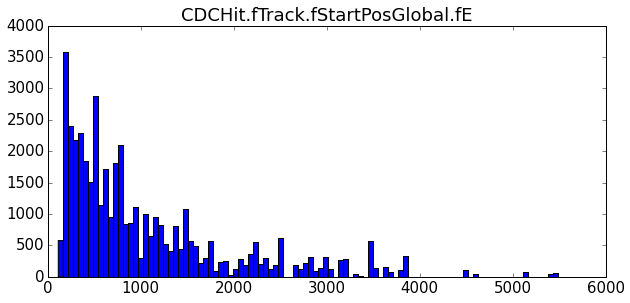

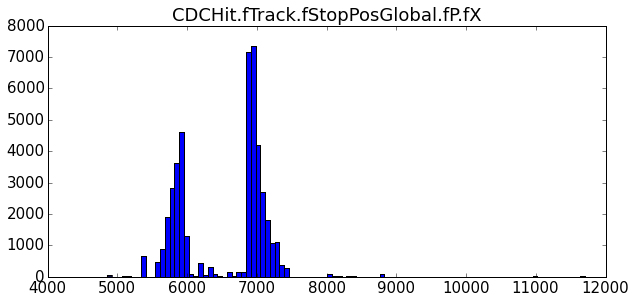

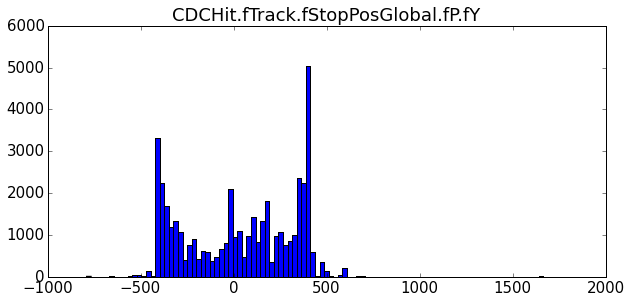

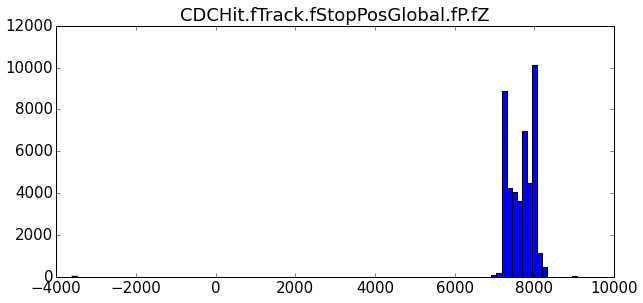

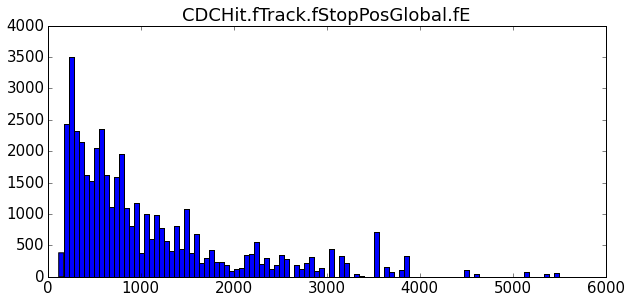

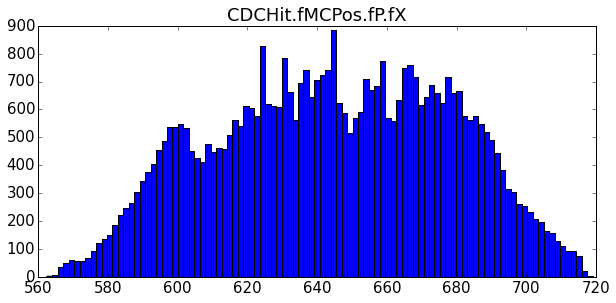

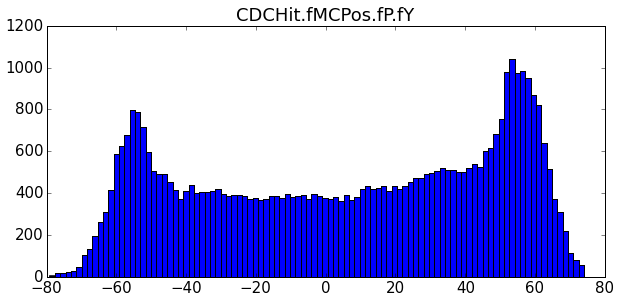

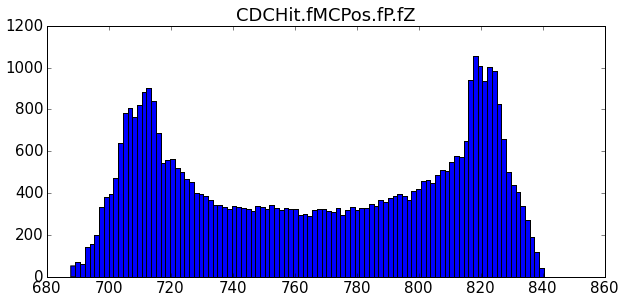

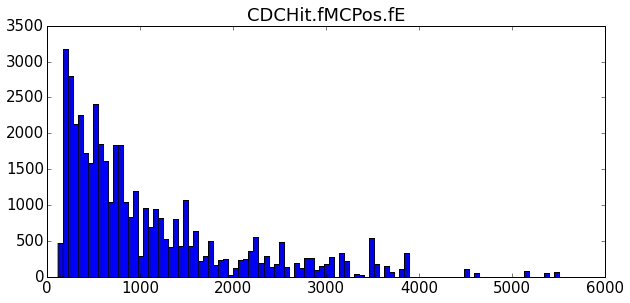

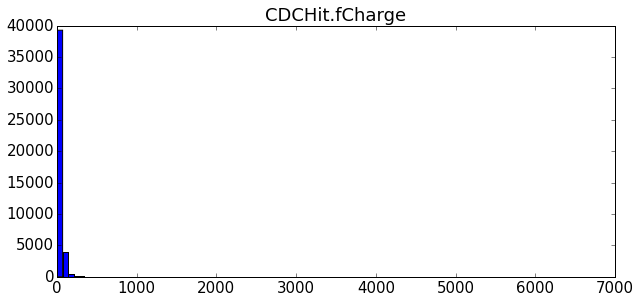

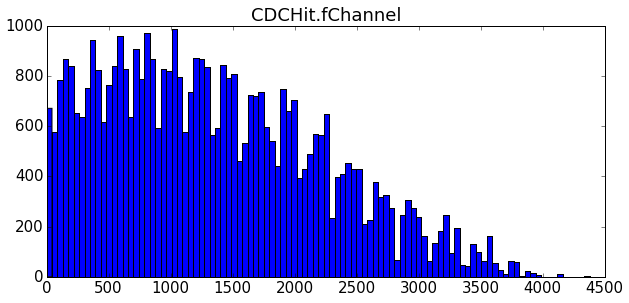

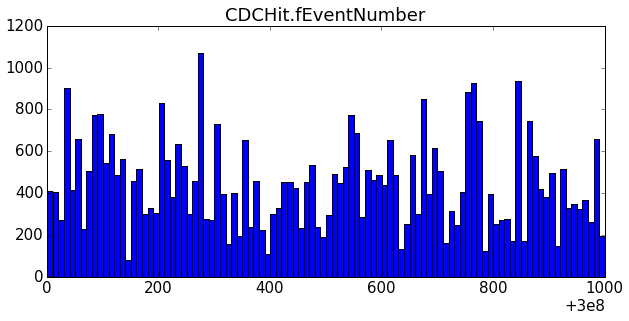

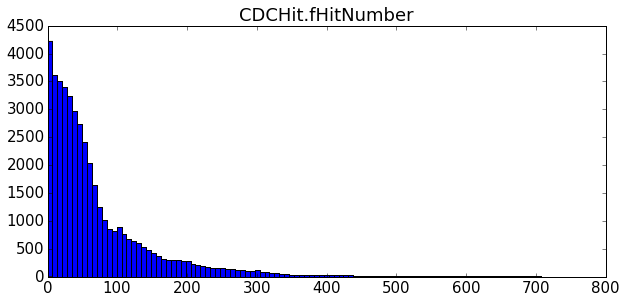

In [312]:
figsize(10,4.5)

for name in ice_sample.dtype.names:
    plt.title(name)
    plt.hist(ice_sample[name], bins=100)
    show()

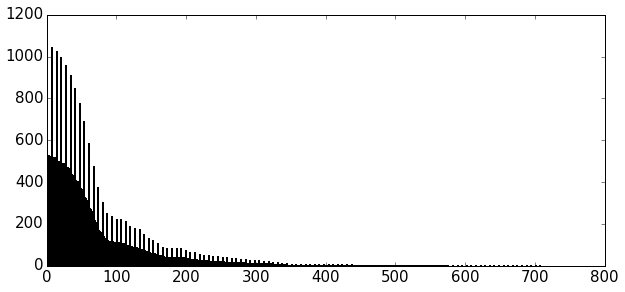

In [313]:
plt.hist(ice_sample["CDCHit.fHitNumber"], bins=600)
show()

In [314]:
print ice_sample["CDCHit.fEventNumber"]

[300000001 300000001 300000001 ..., 300001000 300001000 300001000]


In [315]:
print np.sort(np.array(Counter(ice_sample["CDCHit.fEventNumber"]).items())[:,1])

[  1   1   2   2   4   5   6   7   7   7   8   9   9  10  12  12  12  14
  14  14  14  14  15  15  15  15  16  16  16  17  17  19  19  20  20  21
  22  22  22  23  24  24  25  25  26  26  26  26  26  26  26  27  27  27
  28  29  29  29  30  30  31  31  31  31  32  32  32  32  33  33  33  33
  33  33  34  34  34  35  35  35  35  35  35  35  36  36  36  36  36  36
  36  36  37  37  37  37  37  37  37  37  38  38  38  39  39  39  40  40
  40  41  41  41  41  41  41  41  42  42  42  42  42  43  43  43  43  43
  44  45  45  45  45  45  46  46  46  46  46  47  47  47  47  47  47  47
  47  47  47  48  48  48  48  48  48  48  49  49  49  49  49  49  49  50
  50  50  51  51  51  51  51  51  51  52  52  52  52  52  52  52  52  52
  52  52  53  53  53  53  53  53  53  54  54  54  54  54  54  54  54  55
  55  55  55  55  55  55  55  56  56  56  56  57  57  57  57  57  57  57
  57  57  58  58  58  58  58  58  59  59  59  59  59  59  59  59  59  59
  60  60  60  60  60  60  60  60  60  60  61  61  6

In [316]:
del ice_sample

In [317]:
import hits

In [318]:
reload(hits)

<module 'hits' from '../modules/hits.pyc'>

In [319]:
from hits import FlatHits

In [320]:
def init_flat_hits(data_file):
    return FlatHits(path=data_file, 
                    tree="COMETEventsSummary", 
                    prefix="CDCHit.f", 
                    key_name="EventNumber",
                    hit_type_name="TurnID",
                    branches=["Charge", 
                              "Channel", 
                              "HitNumber", 
                              "MCPos.fE", 
                              "DriftDist",
                              "CDCHit.fTrack.fTags.fTagMaskPersisted",
                              "CDCHit.fTrack.fTrackID",
                              "CDCHit.fTrack.fPID",
                              "CDCHit.fTrack.fStartMomentum.fX",
                              "CDCHit.fTrack.fStartMomentum.fY",
                              "CDCHit.fTrack.fStartMomentum.fZ"],
                    use_evt_idx=True)

In [321]:
ice_sig = init_flat_hits(sig_file)

In [322]:
ice_back = init_flat_hits(bck_file)

In [323]:
ice_flat = ice_sig

In [324]:
print ice_flat.all_branches
print ice_flat.n_events
print ice_flat.n_hits
print ice_flat.event_to_n_hits
print ice_flat.event_to_hits

['CDCHit.fCharge', 'CDCHit.fChannel', 'CDCHit.fHitNumber', 'CDCHit.fMCPos.fE', 'CDCHit.fDriftDist', 'CDCHit.fTrack.fTags.fTagMaskPersisted', 'CDCHit.fTrack.fTrackID', 'CDCHit.fTrack.fPID', 'CDCHit.fTrack.fStartMomentum.fX', 'CDCHit.fTrack.fStartMomentum.fY', 'CDCHit.fTrack.fStartMomentum.fZ', 'CDCHit.fTurnID', 'CDCHit.fEventNumber', 'CDCHit.fhits_index', 'CDCHit.fevent_index']
532
44291
[ 34  26  70  74 146  58  14  32  64  65  67  39 123  60  69  12  53  43
  36 372  31  66 306  63  64  65  69  54  72  40 114  67 155  61  34 343
  60  35  59  75  10 166  47  75  54 156 235  33  59  38 334  75 197 198
  84   1  67 230  68  62 264 149  69 493  70  50  72  88 326  66  45 218
  66  48 118  14  37  31  85  63  72 220  16 192 160  52  45  64  16  49
 164  73  63 206  61  62  84  30  45  33  49 149 198  32 286  42  64  59
 298 150  44   9  58  78 216  39  50  55  46 157  85  71  60  41 120 169
 118  72  70 101  57  57  80  54  53 139  22  37  26  68  30 135  72  58
 708  81  25  58  66  20  

In [325]:
import pandas

In [326]:
iced_df = pandas.DataFrame(ice_flat.data)
iced_df

CDCHit.fCharge  CDCHit.fChannel  CDCHit.fHitNumber  CDCHit.fMCPos.fE  \
0                  37              183                  0       2366.345215   
1                  60              184                  1       2366.378662   
2                  26              384                  2       2366.443604   
3                  23              385                  3       2366.510254   
4                   5              599                  4       2366.552246   
5                  83              600                  5       2366.584961   
6                  27              601                  6       2366.619141   
7                  10              812                  7       2366.667725   
8                  73              813                  8       2366.736816   
9                   7              814                  9       2366.766357   
10                 20             1040                 10       2366.795654   
11                 55             1041                 11       2366.829102   
12                 87             1042                 12       2366.895752   
13                 52             1266                 13       2366.941895   
14                 35             1267                 14       2367.011230   
15                 22             1268                 15       2367.079590   
16                  4             1506                 16       2367.124512   
17                 36             1507                 17       2367.159668   
18                 64             1508                 18       2367.225342   
19                 56             1509                 19       2367.259766   
20                 38             1510                 20       2367.329590   
21                 54             1512                 21       2367.765137   
22                114             1513                 22       2367.831055   
23                 39             1514                 23       2367.897705   
24                 37             1515                 24       2368.000488   
25                 45             1516                 25       2368.033691   
26                 80             1517                 26       2368.100586   
27                 55             1518                 27       2368.166992   
28                 31             1746                 28       2367.363281   
29                 62             1747                 29       2367.429932   
...               ...              ...                ...               ...   
44261              47             1693                 34        674.481689   
44262              66             1694                 35        674.515015   
44263              13             1695                 36        674.583374   
44264              17             1715                 37        675.866028   
44265              41             1716                 38        675.899414   
44266              62             1717                 39        675.966064   
44267              44             1718                 40        675.999451   
44268              15             1938                 41        674.625000   
44269              42             1939                 42        674.692627   
44270             149             1940                 43        674.759277   
44271             104             1941                 44        674.792664   
44272               7             1942                 45        674.853638   
44273              13             1953                 46        675.613647   
44274              49             1954                 47        675.646118   
44275              22             1955                 48        675.713684   
44276             578             1956                 49        675.780396   
44277              46             1957                 50        675.813660   
44278              83             2195                 51        674.877991   
44279             292             2196                 52

In [327]:
del iced_df

# Visualize Data

In [328]:
figsize(12,8)
plot_set_font()

In [329]:
from cylinder import CyDet
geom = CyDet()

### Histograms

In [330]:
# Hit times relative to the earliest hit in the detector
rel_hit_times = np.concatenate(
    [ice_flat.get_events(evt)["CDCHit.fMCPos.fE"] - np.amin(ice_flat.get_events(evt)["CDCHit.fMCPos.fE"]) \
     for evt in list(np.unique(ice_flat.hits_to_events))])
print rel_hit_times.shape

(44291,)


In [331]:
# Hit number in the event 
print ice_flat.get_events()["CDCHit.fHitNumber"].shape

(44291,)


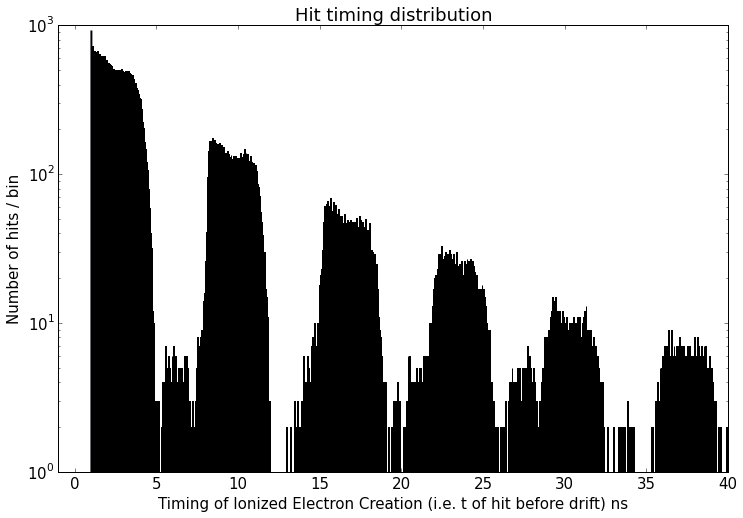

In [332]:
plt.hist(rel_hit_times + 1, bins=1000, log=True)
plt.xlim(-1,40)
plt.title("Hit timing distribution")
plt.xlabel("Timing of Ionized Electron Creation (i.e. t of hit before drift) ns")
plt.ylabel("Number of hits / bin")
plt.show()

In [333]:
def compare_raw_variable(name, **kwargs):
    compare_dists(ice_flat.get_events[name], 
                  ice_back.get_events[name],
                  **kwargs)

In [334]:
def compare_dists(dist_1, dist_2, **kwargs):
    plt.hist(dist_1, color='b', **kwargs)
    plt.hist(dist_2, color='r', **kwargs)
    plt.show()

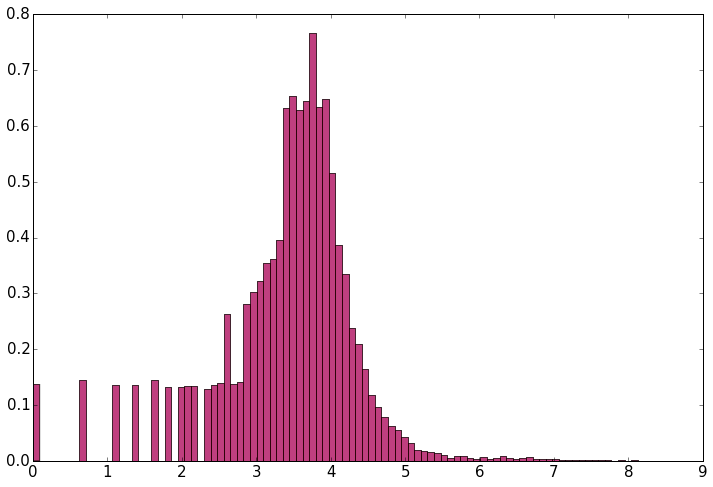

In [335]:
figsize(12,8)
compare_dists(np.log(ice_flat.get_events()["CDCHit.fCharge"]),
              np.log(ice_sig.get_events()["CDCHit.fCharge"]), 
              bins=100, 
              alpha=0.5,
              normed=1)
plt.show()

In [336]:
print np.unique(ice_flat.get_events()["CDCHit.fChannel"])

[   0    1    2 ..., 4258 4381 4382]


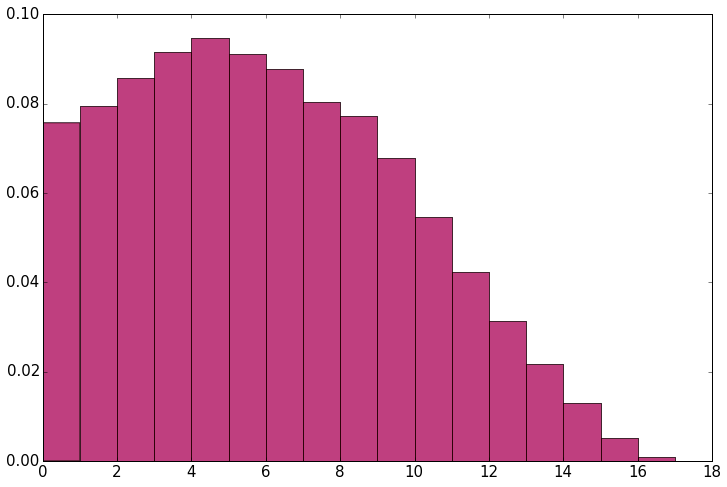

In [337]:
plt.hist(geom.point_layers[ice_flat.get_events()["CDCHit.fChannel"]], 
         bins=17, 
         normed=1, 
         alpha = 0.5)
plt.hist(geom.point_layers[ice_sig.get_events()["CDCHit.fChannel"]], 
         bins=17, 
         normed=1, 
         alpha = 0.5,
         color='r')
plt.show()

In [338]:
all_max = list()
for event in list(np.unique(ice_flat.hits_to_events)):
    all_max.append(np.amax(ice_flat.get_events(event)["CDCHit.fHitNumber"]))

In [339]:
all_max.sort()
print all_max[-100:]

[116, 117, 117, 117, 118, 118, 119, 122, 124, 127, 128, 129, 129, 133, 133, 134, 134, 134, 135, 135, 136, 136, 137, 138, 138, 139, 141, 142, 142, 142, 143, 144, 145, 145, 147, 148, 148, 148, 149, 152, 154, 155, 155, 156, 157, 157, 159, 159, 162, 162, 163, 163, 164, 165, 165, 168, 170, 173, 191, 193, 196, 197, 197, 201, 202, 203, 205, 206, 214, 215, 215, 217, 219, 229, 229, 234, 237, 245, 253, 254, 263, 269, 275, 277, 285, 297, 304, 305, 315, 321, 325, 331, 333, 342, 346, 371, 436, 492, 575, 707]


### Turn Tagging

In [340]:
from collections import OrderedDict

In [341]:
ice_flat.sort_hits("CDCHit.fMCPos.fE")

In [342]:
tdiff_last_hit = np.zeros(0)
chandiff_last_hit = np.zeros(0)
for event in list(np.unique(ice_flat.hits_to_events)):
    # Only look at the zeroth layer
    event_hits = ice_flat.filter_hits(ice_flat.get_events(event), "CDCHit.fChannel", less_than=198)
    # Get the difference from the last hit to the next hit in time
    event_tdiff = event_hits["CDCHit.fMCPos.fE"][1:] - event_hits["CDCHit.fMCPos.fE"][:-1]
    tdiff_last_hit = np.append(tdiff_last_hit, event_tdiff)
    # Check the channel displacement as well
    event_cdiff = np.absolute(event_hits["CDCHit.fChannel"][1:] - event_hits["CDCHit.fChannel"][:-1])
    event_cdiff = np.minimum(event_cdiff, 198 - event_cdiff)
    chandiff_last_hit = np.append(chandiff_last_hit, event_cdiff)

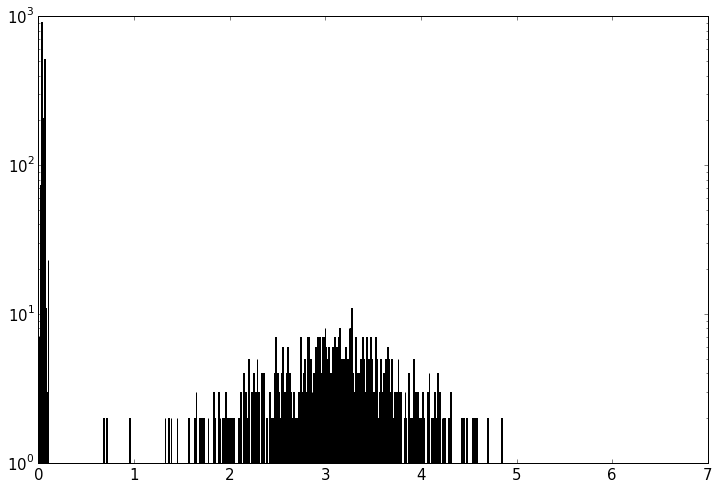

In [343]:
plt.hist(tdiff_last_hit, bins=700, log=True)
plt.show()

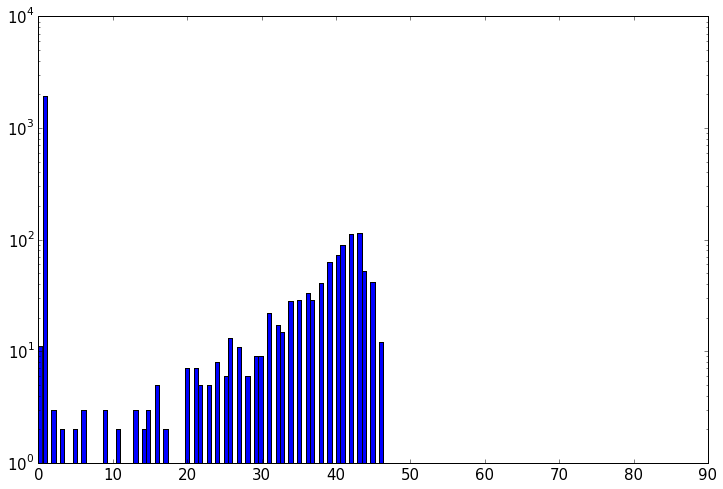

In [344]:
plt.hist(chandiff_last_hit, bins=88, log=True)
plt.xlim(0,90)
plt.show()

In [345]:
count_all_chan_diffs = Counter(chandiff_last_hit)
print np.unique(chandiff_last_hit)

[  0.   1.   2.   3.   4.   5.   6.   9.  10.  11.  12.  13.  14.  15.  16.
  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.  29.  30.  31.
  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.  43.  44.  45.  46.
  47.  48.  49.  51.]


### Event Display

In [346]:
all_event = numpy.zeros((ice_flat.n_events, geom.n_points))
all_times = []
index_to_event = []

In [347]:
for index, event in enumerate(list(np.unique(ice_flat.hits_to_events))[:]):
    # Hit and turn identifiers 
    hit_wires = ice_flat.get_events(events=event)["CDCHit.fChannel"]
    turn_values = ice_flat.get_events(events=event)["CDCHit.fTurnID"] 
    all_event[index,hit_wires] = 1 + turn_values
    # Timing considerationgs
    turn_val_timing = dict()  
    hit_timing = ice_flat.get_events(events=event)["CDCHit.fMCPos.fE"]
    for hit, tval in zip(hit_timing, turn_values):
        turn_val_timing[tval] = turn_val_timing.get(tval, []) + [hit]
    all_times += [dict(turn_val_timing)]
    index_to_event.append(event)

Event 4
1 74 2534.54003906 2537.79541016 2536.17488717
2 72 2541.7277832 2545.03515625 2543.41318088
Regestered hits 104
Missed hits 0
All hits 146


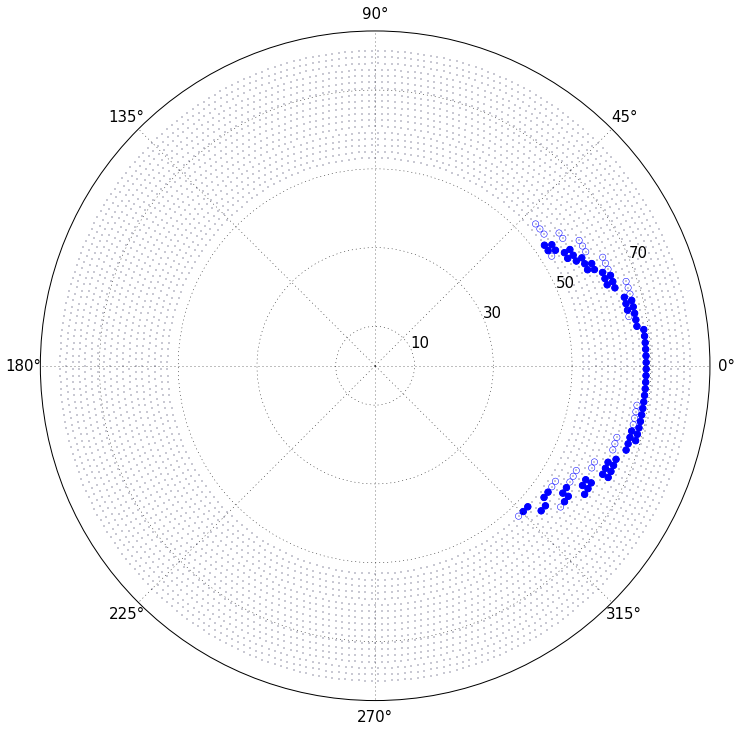

Event 12
1 62 3025.69628906 3028.61474609 3027.18345199
2 61 3032.90332031 3035.83496094 3034.36626297
Regestered hits 85
Missed hits 0
All hits 123


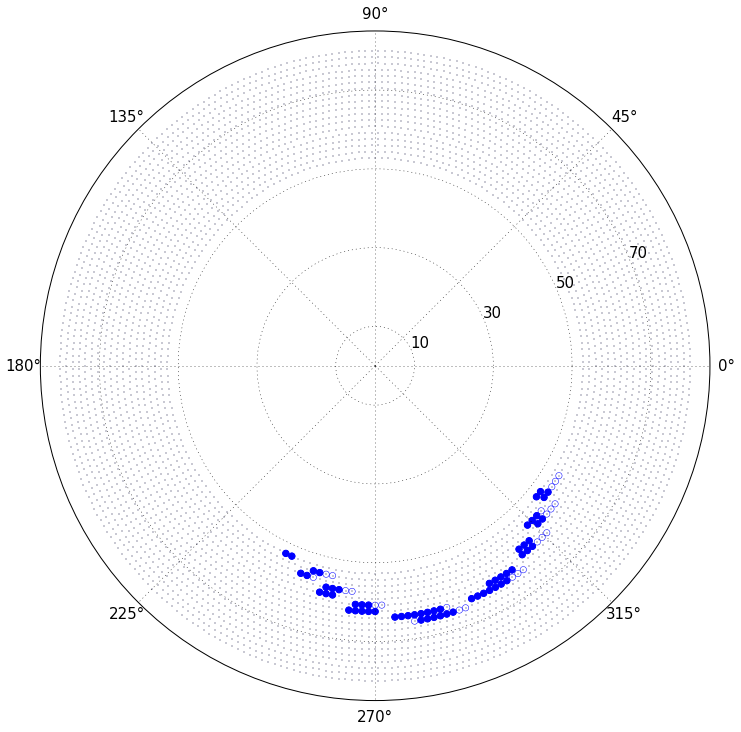

Event 19
0 1 945.8125 945.8125 945.8125
1 75 942.111206055 945.399902344 943.7621875
2 76 949.185058594 952.515625 950.872165881
3 73 956.280700684 959.554504395 957.888621709
4 71 963.281860352 966.517578125 964.941526601
5 76 970.172363281 973.504394531 971.867349725
Regestered hits 182
Missed hits 1
All hits 372


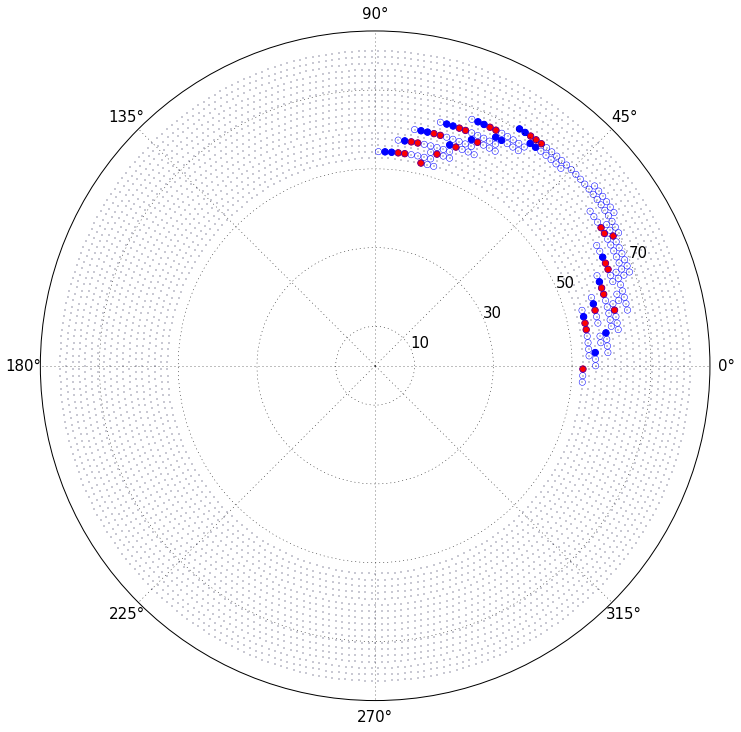

Event 22
0 4 595.181030273 598.418579102 596.553436279
1 79 570.997375488 574.310119629 572.646857539
2 74 577.932250977 581.229858398 579.511308825
3 74 584.894958496 588.06652832 586.508525127
4 75 591.700378418 594.903625488 593.321371257
Regestered hits 149
Missed hits 4
All hits 306


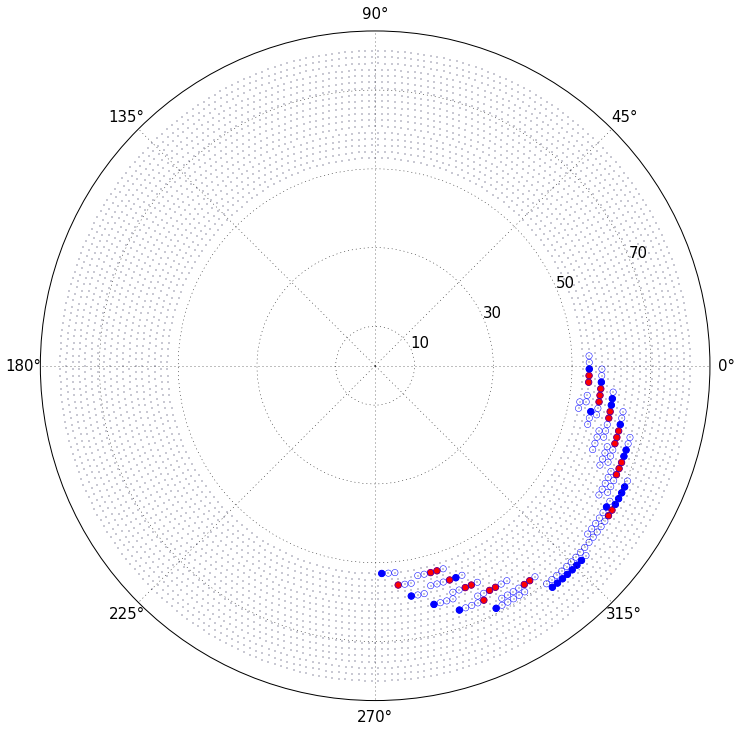

Event 30
1 60 2185.49902344 2188.34985352 2186.92224528
2 54 2192.77539062 2195.33642578 2194.09867802
Regestered hits 101
Missed hits 0
All hits 114


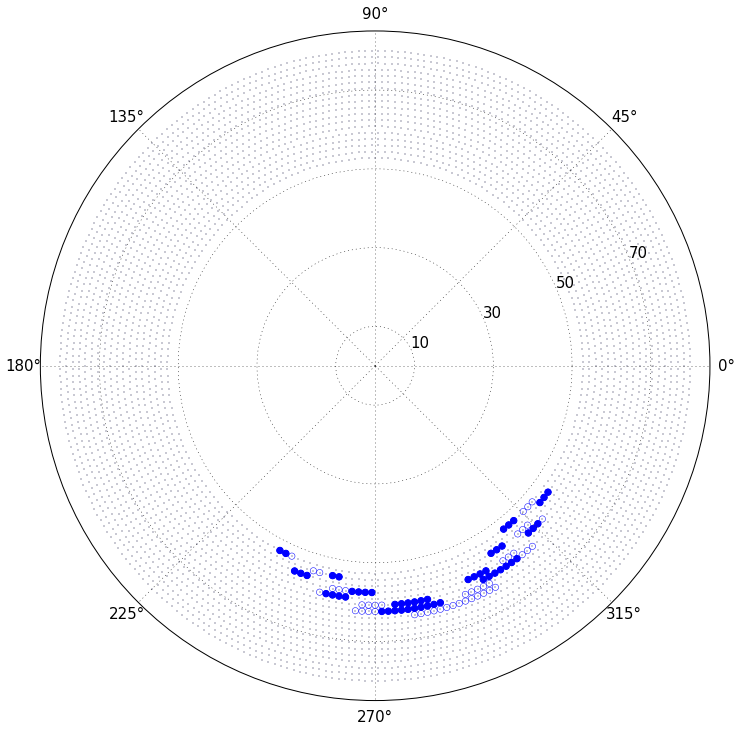

Event 32
1 79 245.816207886 249.314422607 247.56930484
2 76 252.98109436 256.44317627 254.696848618
Regestered hits 111
Missed hits 0
All hits 155


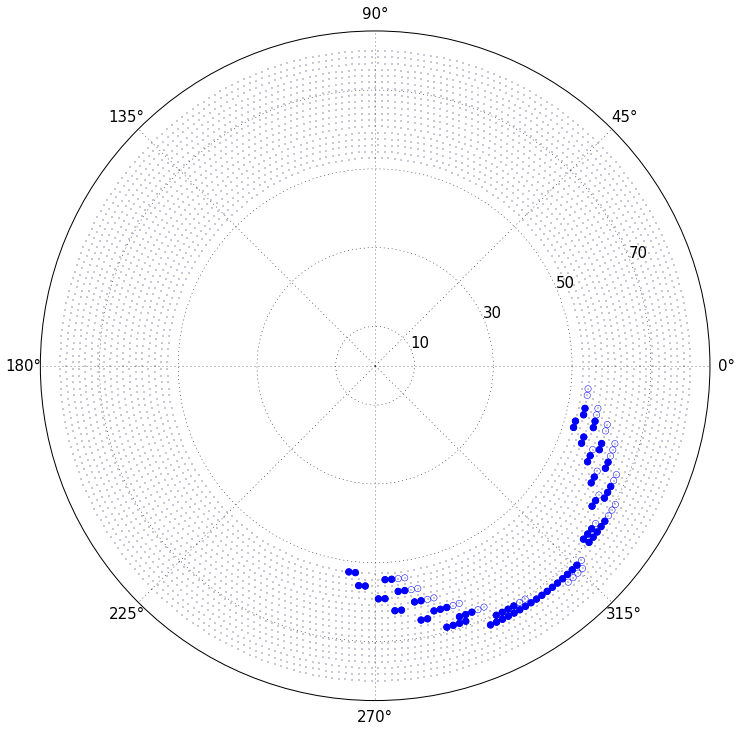

Event 35
0 60 344.613891602 370.800292969 356.285250346
1 62 342.91192627 345.658416748 344.269902875
2 56 349.309204102 351.707580566 350.486345564
3 57 355.39855957 357.775634766 356.625280548
4 56 361.407104492 363.7215271 362.571212224
5 52 367.310974121 369.650268555 368.475033687
Regestered hits 157
Missed hits 41
All hits 343


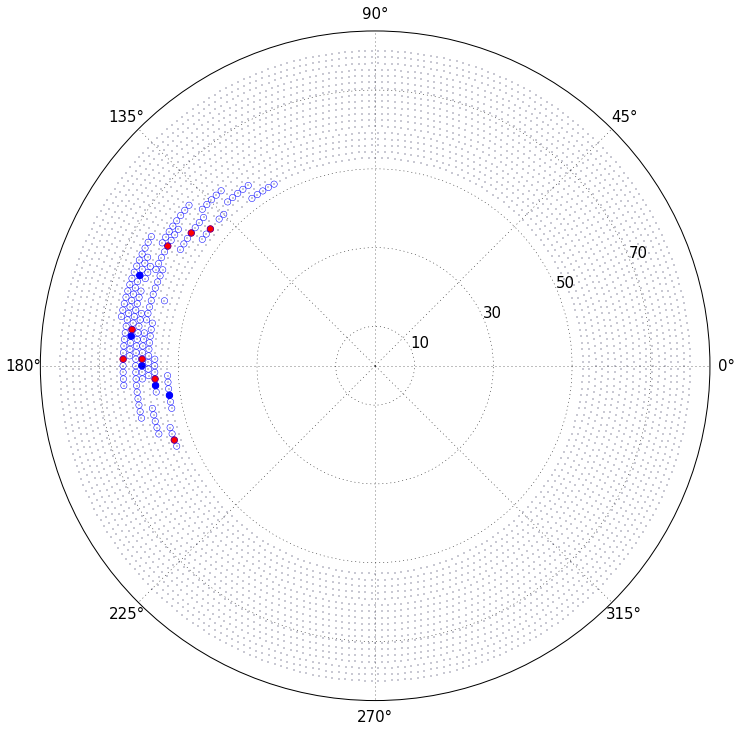

Event 41
1 80 437.291809082 440.939331055 439.121475601
2 86 444.465148926 448.119842529 446.323517555
Regestered hits 122
Missed hits 0
All hits 166


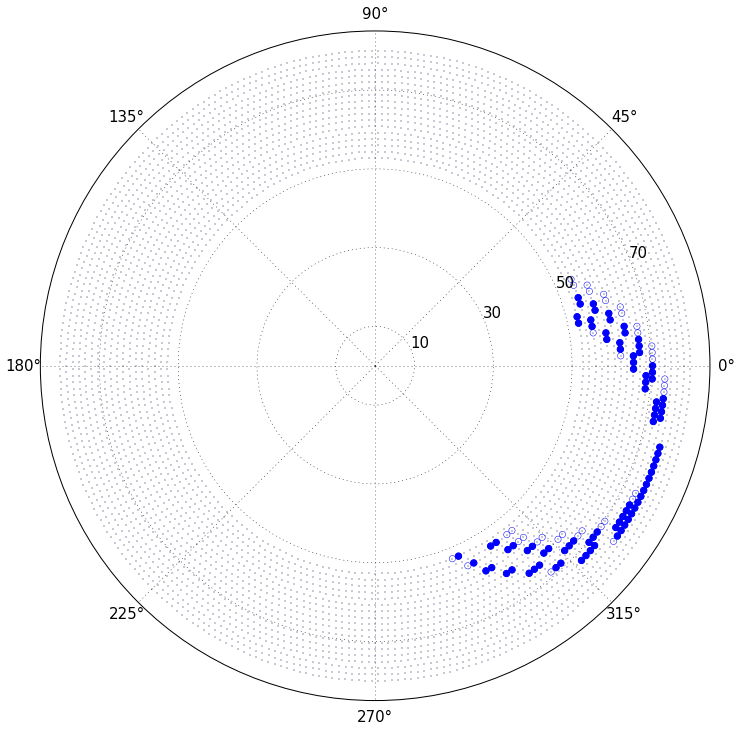

Event 45
1 78 245.33531189 248.686218262 246.94784722
2 78 252.382995605 255.783584595 254.141838661
Regestered hits 124
Missed hits 0
All hits 156


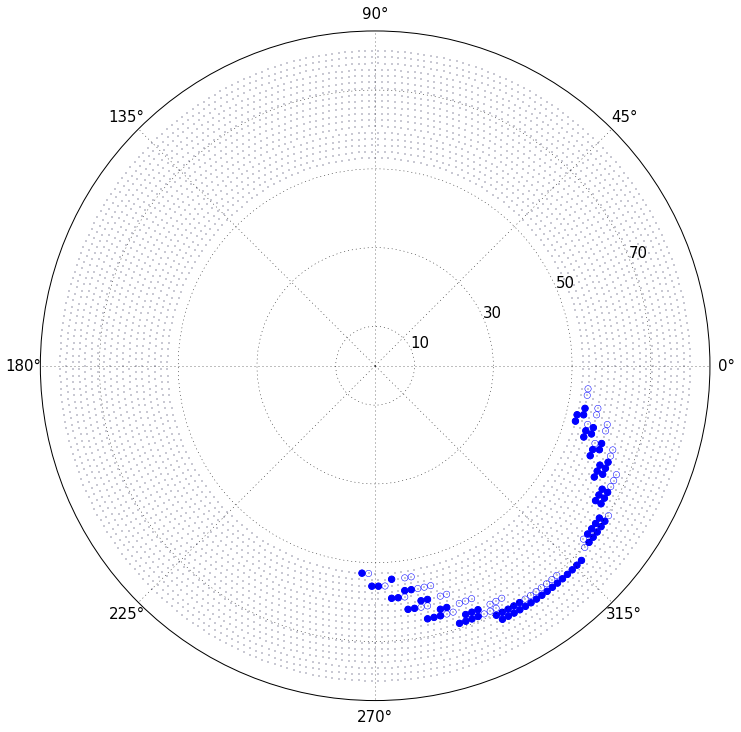

Event 46
0 2 1148.07421875 1149.29858398 1148.68640137
1 58 1146.74023438 1149.37573242 1148.0651624
2 59 1153.72851562 1156.35620117 1155.00284279
3 57 1160.66772461 1163.23779297 1161.92020028
4 59 1167.5480957 1170.1920166 1168.89772784
Regestered hits 105
Missed hits 0
All hits 235


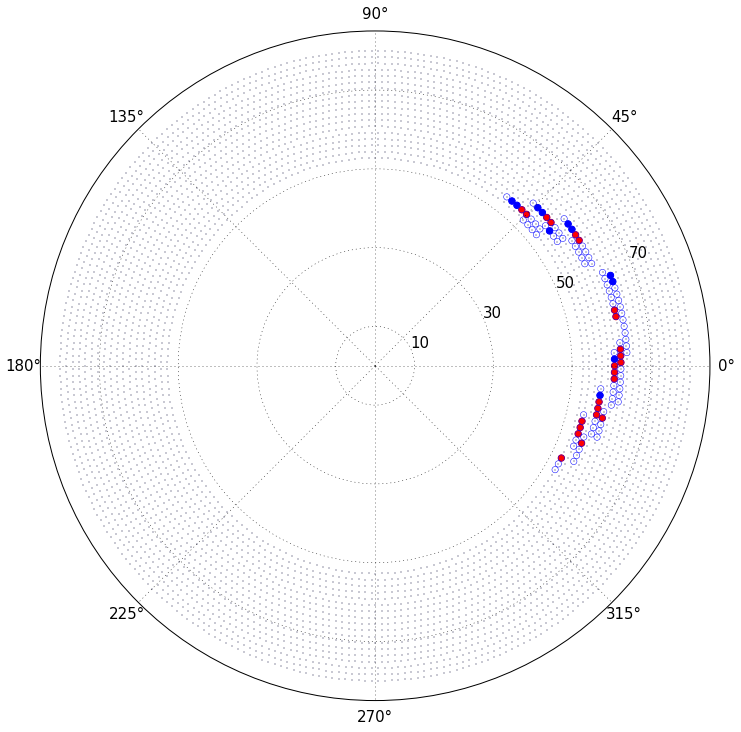

Event 50
1 88 3850.48583984 3854.18359375 3852.32219627
2 82 3857.55566406 3861.20556641 3859.35592726
3 87 3864.59472656 3868.22070312 3866.41409898
4 67 3871.30664062 3874.05322266 3872.71613004
5 10 3877.13037109 3877.45410156 3877.29091797
Regestered hits 219
Missed hits 0
All hits 334


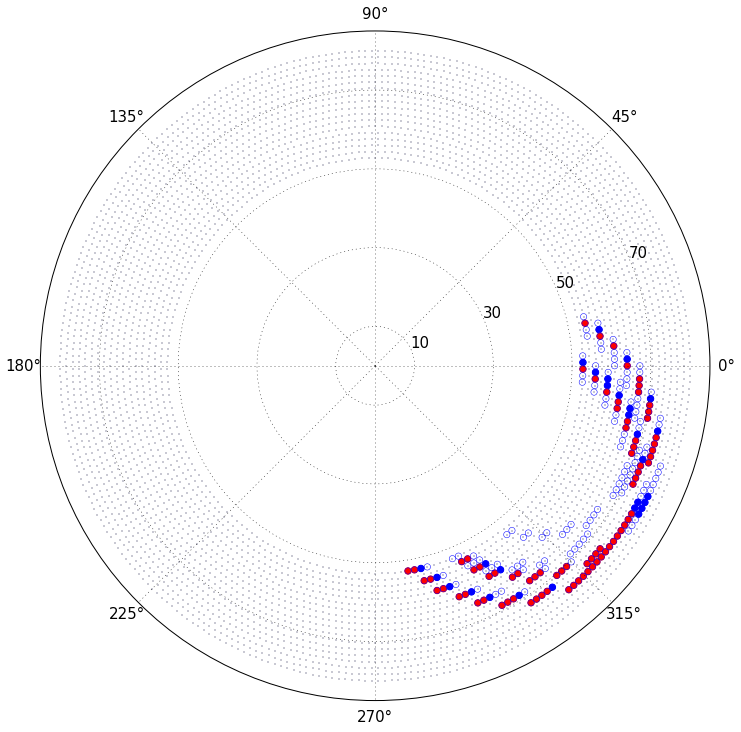

Event 52
1 52 1565.70458984 1568.04077148 1566.84161846
2 51 1572.8807373 1575.22363281 1574.05797143
3 48 1580.00195312 1582.28393555 1581.12004598
4 46 1587.12255859 1589.28076172 1588.1549258
Regestered hits 76
Missed hits 0
All hits 197


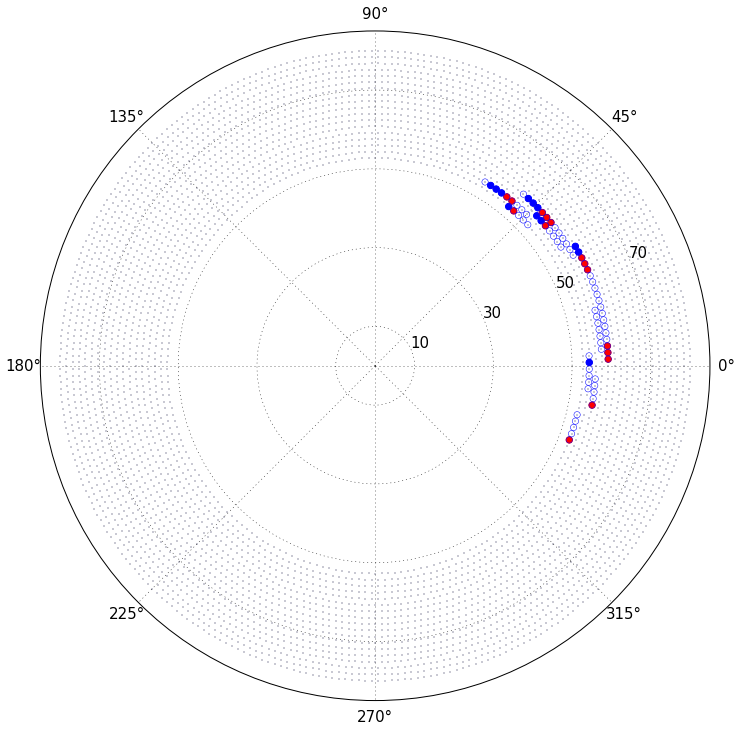

Event 53
0 8 727.282348633 743.353149414 734.179519653
1 64 710.502685547 713.314331055 711.892892838
2 63 717.530517578 720.314941406 718.899692112
3 63 724.485412598 727.326538086 725.885151212
Regestered hits 104
Missed hits 5
All hits 198


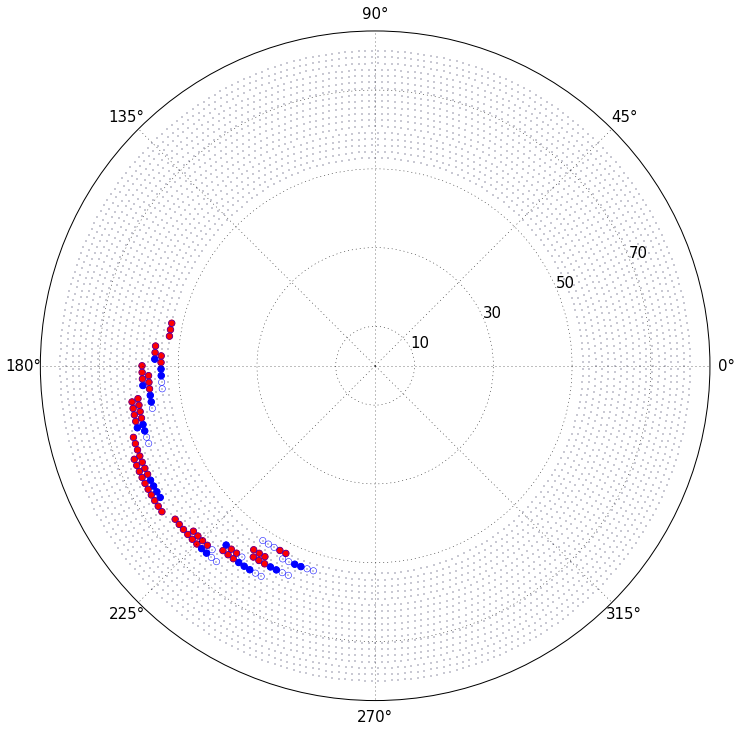

Event 57
1 78 195.343734741 198.70690918 197.039415408
2 79 202.498840332 205.83493042 204.135802643
3 73 209.615844727 212.865753174 211.215856474
Regestered hits 132
Missed hits 0
All hits 230


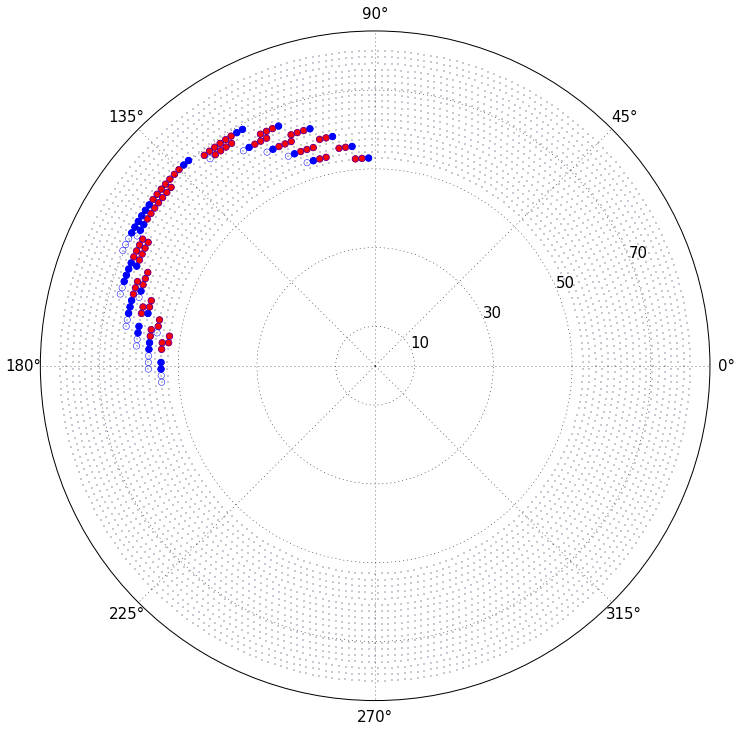

Event 60
1 91 852.915893555 856.739013672 854.831110357
2 85 860.087402344 863.836547852 861.923573932
3 88 867.166137695 870.935791016 869.037073309
Regestered hits 161
Missed hits 0
All hits 264


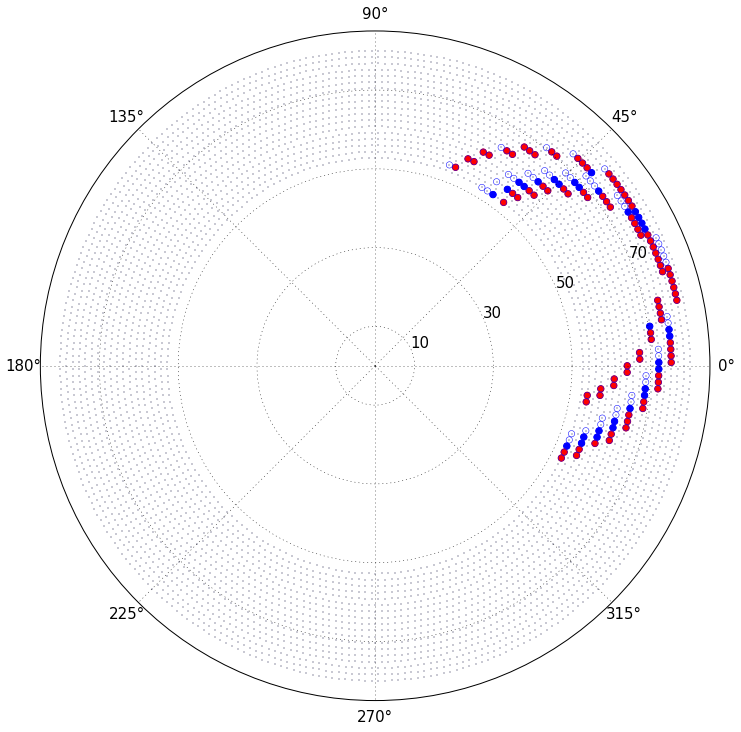

Event 61
0 4 771.949157715 772.829040527 772.347427368
1 54 771.543151855 773.992126465 772.784354881
2 53 778.690246582 781.136474609 779.915536557
3 38 785.905822754 787.758300781 786.857222708
Regestered hits 95
Missed hits 0
All hits 149


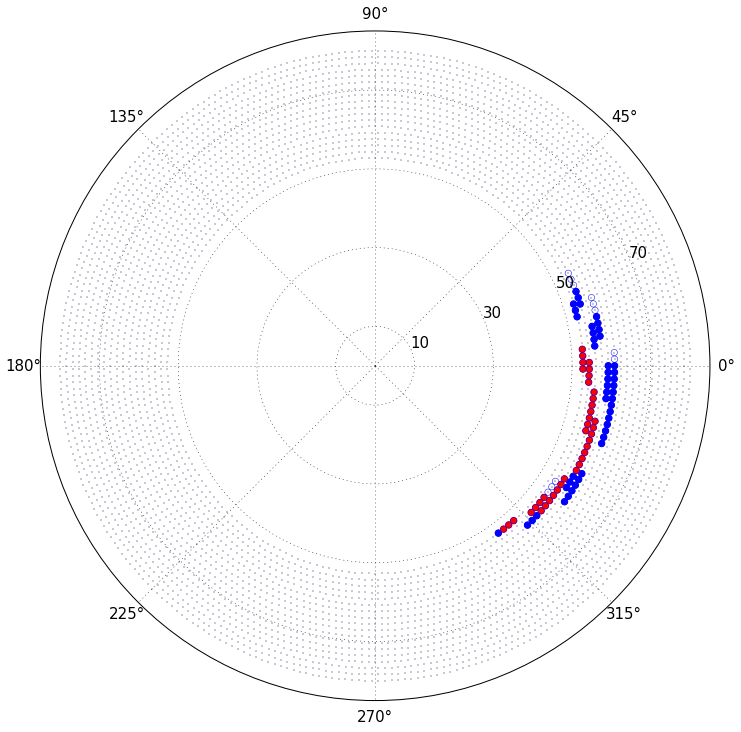

Event 63
0 1 191.5050354 191.5050354 191.5050354
1 65 188.800979614 191.689910889 190.177654795
2 63 195.937362671 198.779968262 197.341042655
3 59 203.010986328 205.837738037 204.458881701
4 63 210.011413574 212.848815918 211.433701773
5 62 216.971710205 219.790557861 218.373483965
6 64 223.907669067 226.707077026 225.333435774
7 60 230.857803345 233.574829102 232.219386292
8 56 237.716812134 240.472091675 239.099971771
Regestered hits 190
Missed hits 1
All hits 493


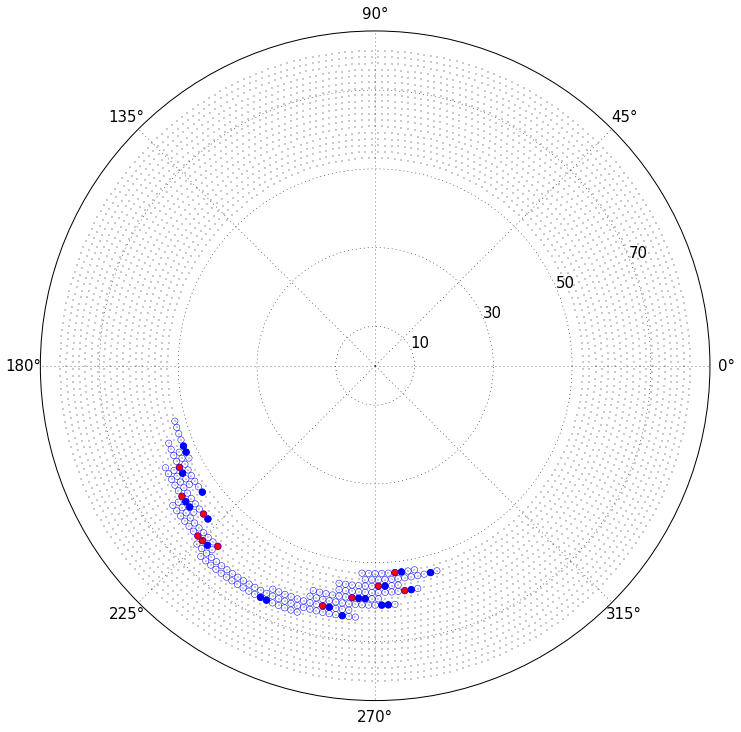

Event 68
1 67 623.081420898 626.108947754 624.628815153
2 69 630.115112305 633.121337891 631.599850862
3 64 637.12878418 640.017944336 638.598856926
4 64 644.032226562 646.867797852 645.399900436
5 62 650.862060547 653.694274902 652.244104201
Regestered hits 150
Missed hits 0
All hits 326


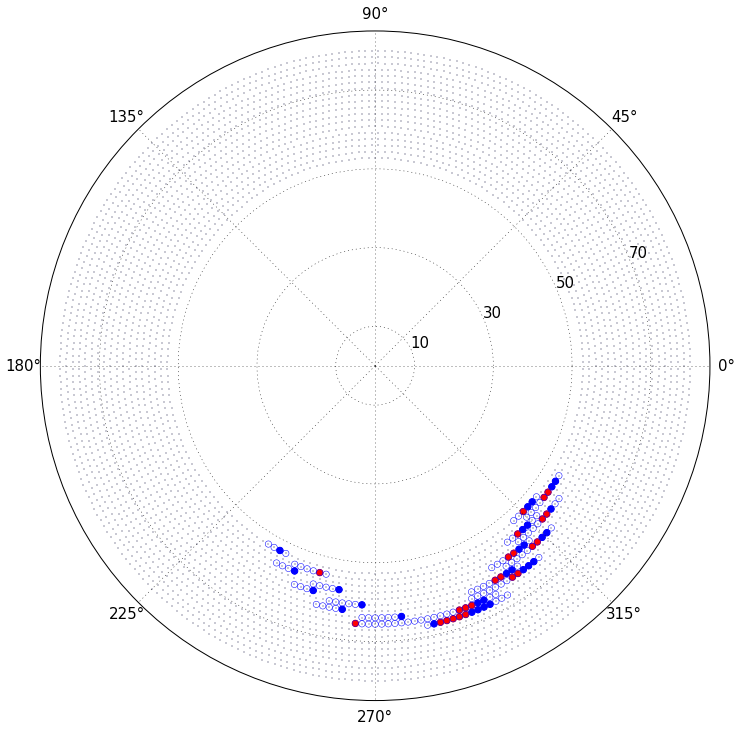

Event 71
1 74 3209.43115234 3212.69433594 3211.04913165
2 72 3216.58789062 3219.82519531 3218.19908312
3 72 3223.75830078 3226.97558594 3225.38619995
Regestered hits 102
Missed hits 0
All hits 218


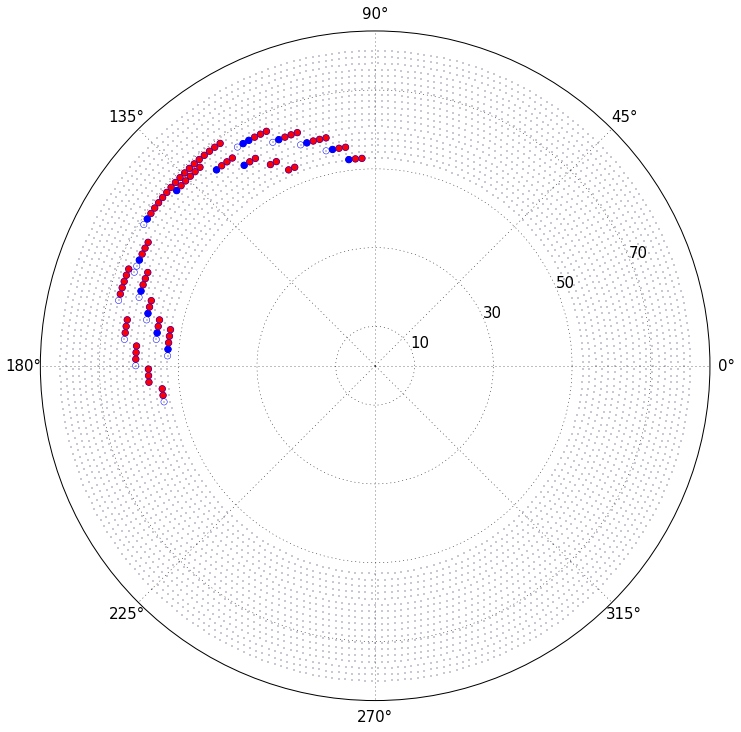

Event 74
1 61 2439.03662109 2441.90795898 2440.49703429
2 57 2446.16821289 2449.03613281 2447.58875154
Regestered hits 90
Missed hits 0
All hits 118


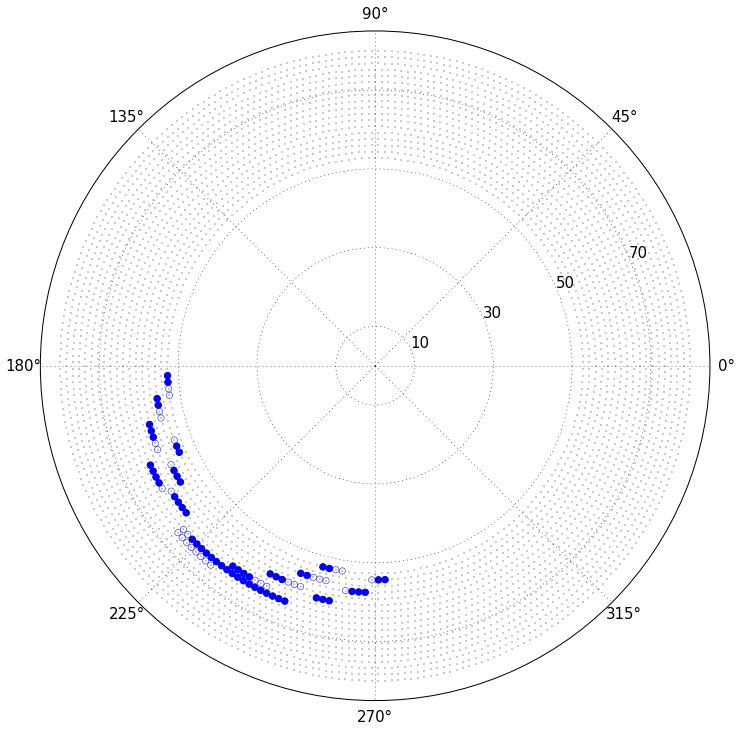

Event 81
0 1 1228.78308105 1228.78308105 1228.78308105
1 59 1205.23742676 1207.82568359 1206.49274199
2 53 1212.35644531 1214.82397461 1213.57280918
3 53 1219.36450195 1221.77148438 1220.54489654
4 54 1226.23242188 1228.74023438 1227.46709979
Regestered hits 109
Missed hits 1
All hits 220


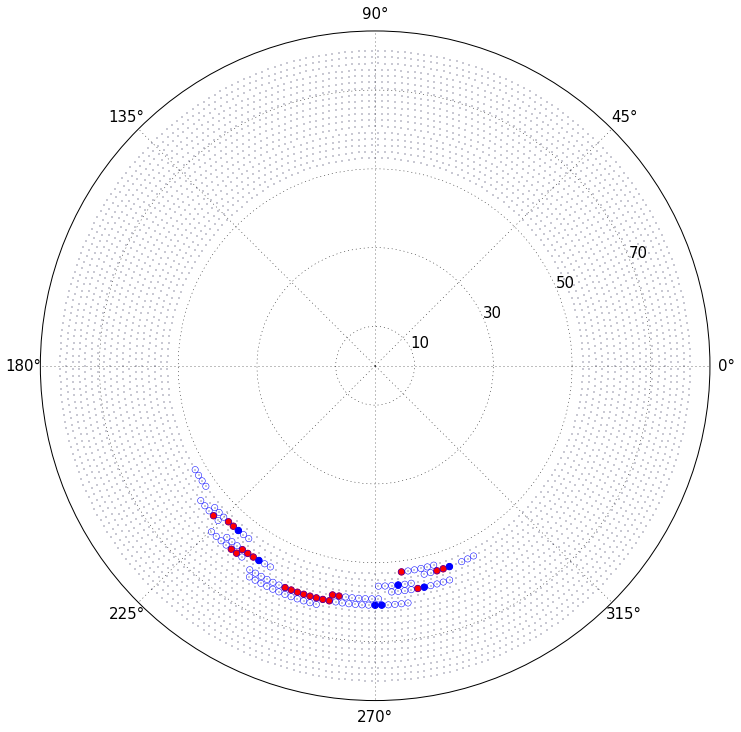

Event 83
1 65 2826.02148438 2829.02783203 2827.56217698
2 62 2833.22119141 2836.12695312 2834.69932113
3 65 2840.25537109 2843.12280273 2841.68783053
Regestered hits 93
Missed hits 0
All hits 192


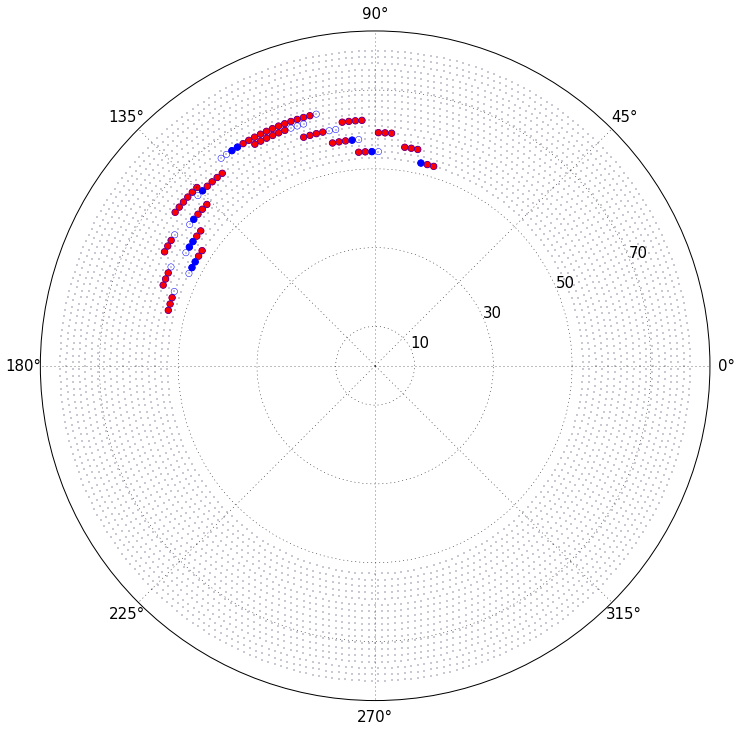

Event 84
1 78 2113.1262207 2116.60180664 2114.89713542
2 82 2120.42285156 2123.91210938 2122.18749405
Regestered hits 122
Missed hits 0
All hits 160


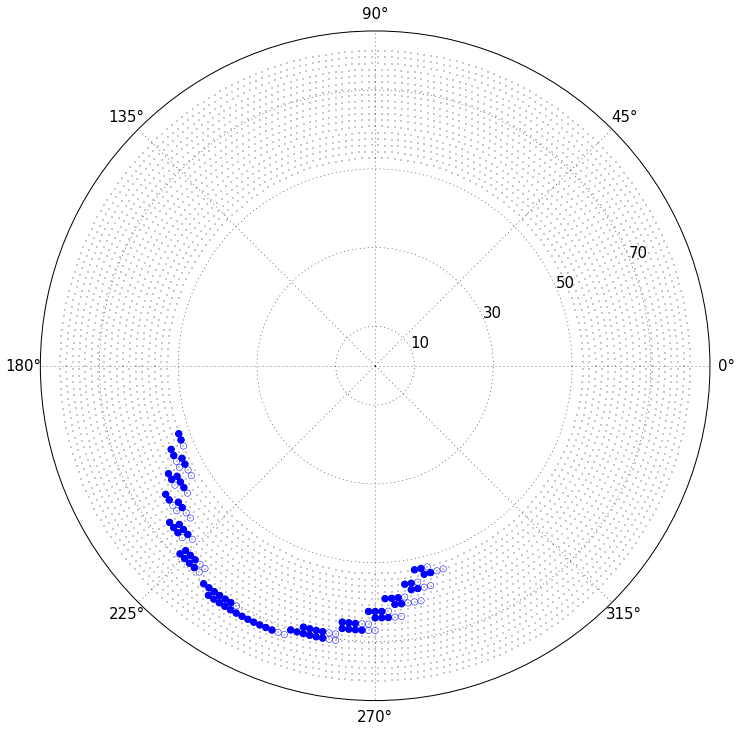

Event 90
0 5 924.052062988 934.166564941 929.490405273
1 81 921.762878418 925.287231445 923.519249433
2 78 928.971679688 932.394714355 930.663438063
Regestered hits 114
Missed hits 5
All hits 164


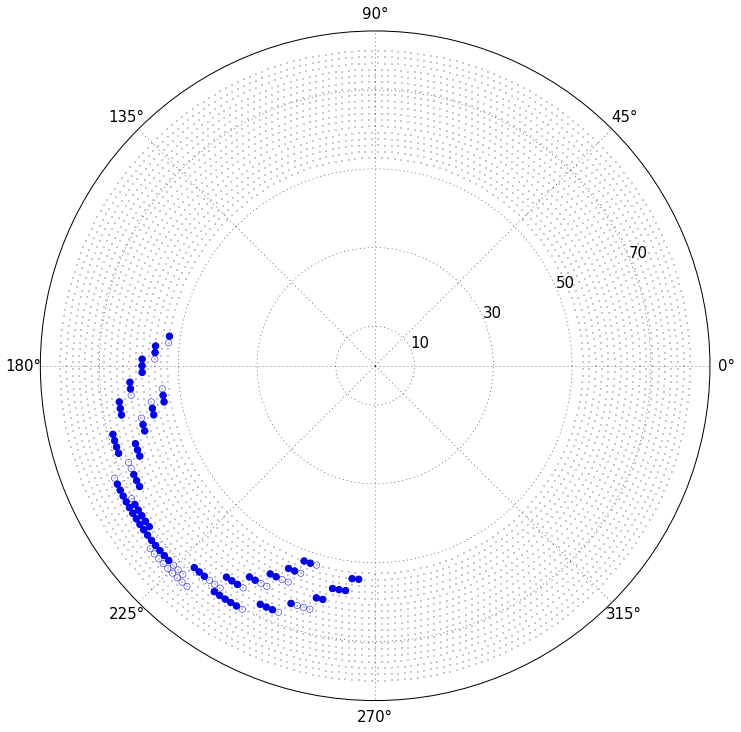

Event 93
1 69 192.378768921 195.532012939 193.95430435
2 69 199.604980469 202.629959106 201.128418632
3 68 206.649902344 209.696746826 208.183333902
Regestered hits 128
Missed hits 0
All hits 206


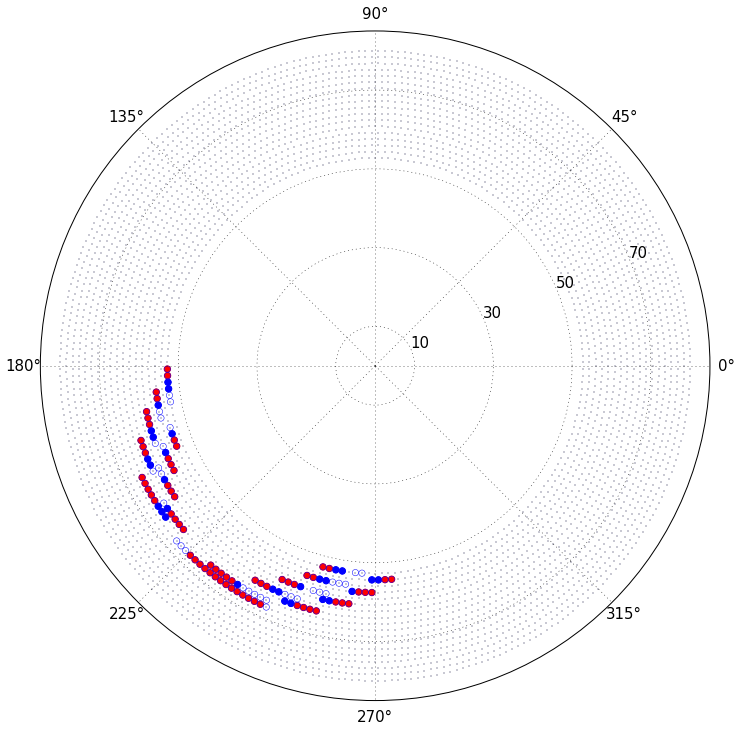

In [348]:
for event in range(100):
    if (2 in all_times[event].keys()):
        plot_output(all_event[event] - 2, geom)
        plot_add_outlines(all_event[event] != 0, geom)
        print "Event {}".format(index_to_event[event])
        this_sum = 0
        for turn in all_times[event].keys():
            n_hits = len(all_times[event][turn])
            print turn, n_hits, \
                        np.amin(all_times[event][turn]), \
                        np.amax(all_times[event][turn]), \
                        np.average(all_times[event][turn])
            this_sum += n_hits
        print "Regestered hits {}".format(sum(all_event[event] != 0))
        print "Missed hits {}".format(sum(all_event[event] == 1))
        print "All hits {}".format(this_sum)
        show()